# Importing Libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns

We import necessary libraries for data manipulation (numpy), visualization (matplotlib and seaborn), image processing (skimage), and machine learning (sklearn).


# Loading Images:

In [2]:
batman = glob.glob("Batman/*.jpg")
ironman  = glob.glob("ironman/*.jpg")
superman = glob.glob('SuperMan/*.jpg')

We use glob to retrieve the file paths of all images in the specified directories.

# Initializing Lists for Images and Labels:

In [3]:
images = []
labels = []

# Reading and Labeling Images:

In [4]:


for i in batman:
    img = plt.imread(i)
    images.append(img)
    labels.append(1)
    
for i in ironman:
    img = plt.imread(i)
    images.append(img)
    labels.append(2)

for i in superman:
    img =plt.imread(i)
    images.append(img)
    labels.append(3)
    


We read each image using plt.imread and append the image data to the images list and the corresponding label to the labels list. Labels are numerical identifiers for each class (1 for Batman, 2 for Ironman, and 3 for Superman).

# Shuffling the Data:

In [10]:
label_names = {1: 'Batman', 2: 'Ironman', 3: 'Superman'}

In [11]:
images, labels = shuffle(images,labels)

# Visualizing Some Images:



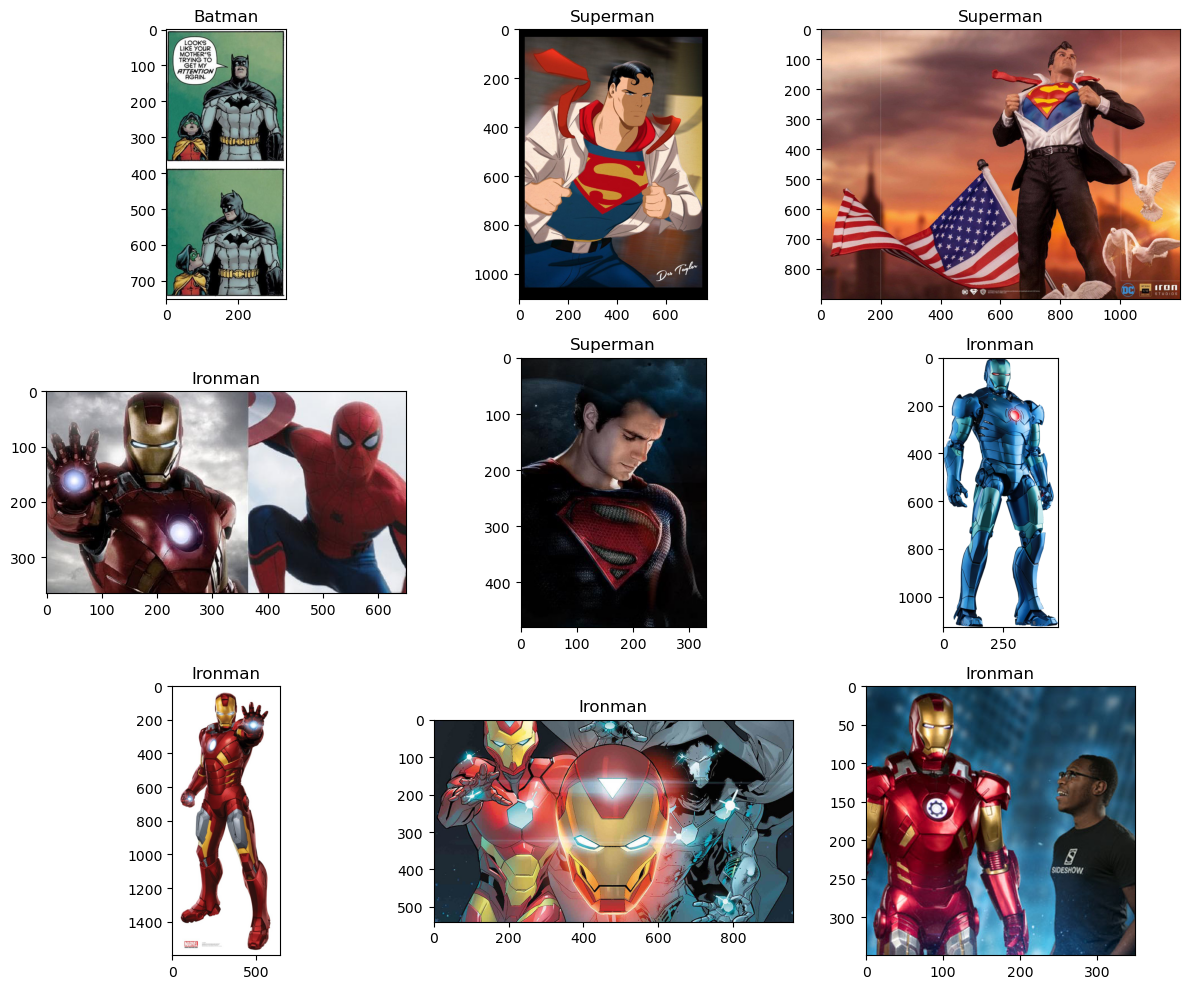

In [12]:
plt.figure(figsize=(12,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.title(label_names[labels[i]])
plt.tight_layout()

We plot the first 9 images to visually verify the data.

# Resizing Images:

In [13]:
X = []

for i in images:
    X.append(resize(i,(300,300,3)))

We resize all images to a uniform size of 300x300 pixels with 3 color channels (RGB).

# Visualizing Resized Images:

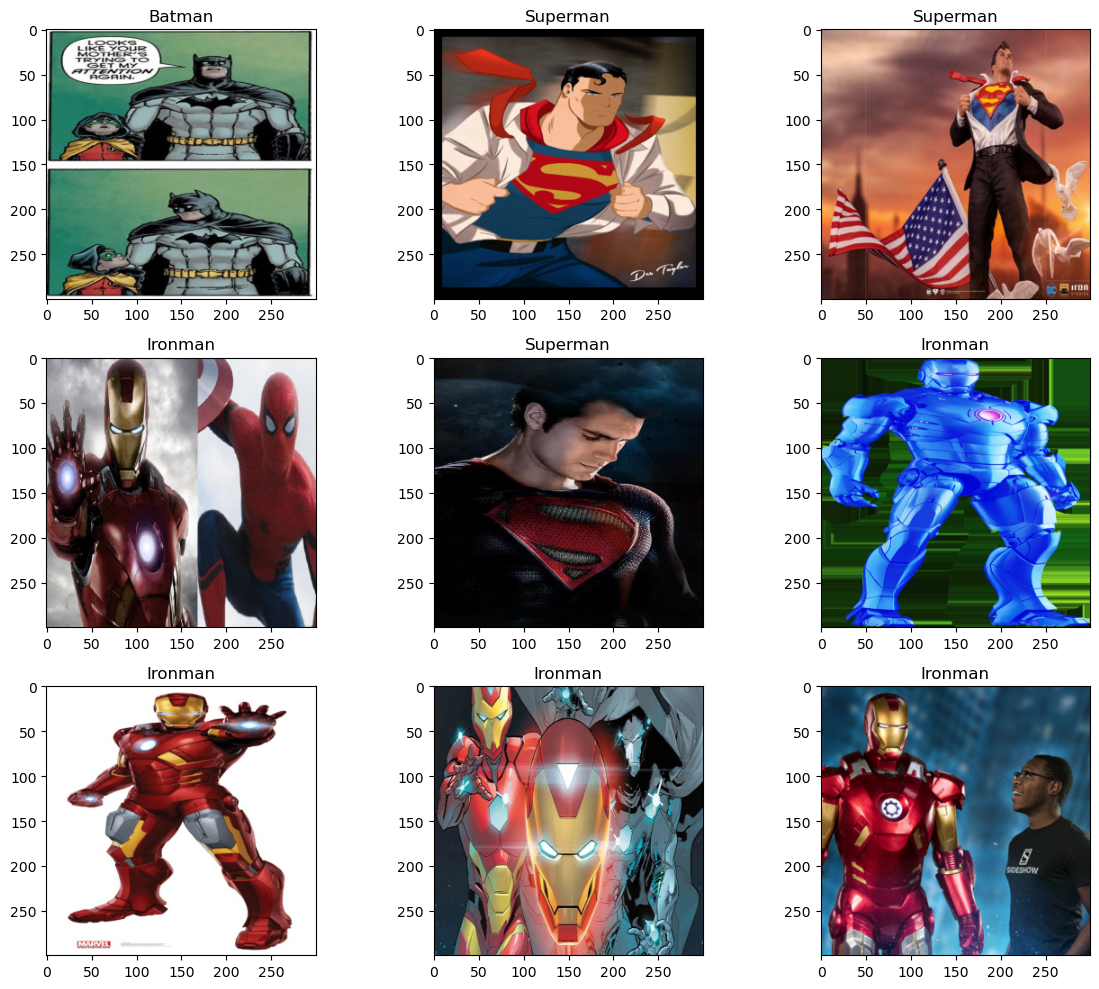

In [14]:
plt.figure(figsize=(12,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X[i])
    plt.title(label_names[labels[i]])
plt.tight_layout()

# Preparing Data for the Model:

In [15]:
X = np.array(X)
y = np.array(labels)

In [16]:
d1,d2,d3,d4 = X.shape

In [17]:
X = X.reshape((d1, d2*d3*d4))

We convert the list of images (X) and labels (y) to numpy arrays.
We reshape X to a 2D array where each row represents a flattened image (300x300x3).

# Splitting Data into Training and Testing Sets:



In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Training the SVM Model:

In [19]:
model = SVC()

In [20]:
model.fit(X_train, y_train)

SVC()

# Making Predictions:



In [21]:
y_pred = model.predict(X_test)

# Visualizing Predictions:

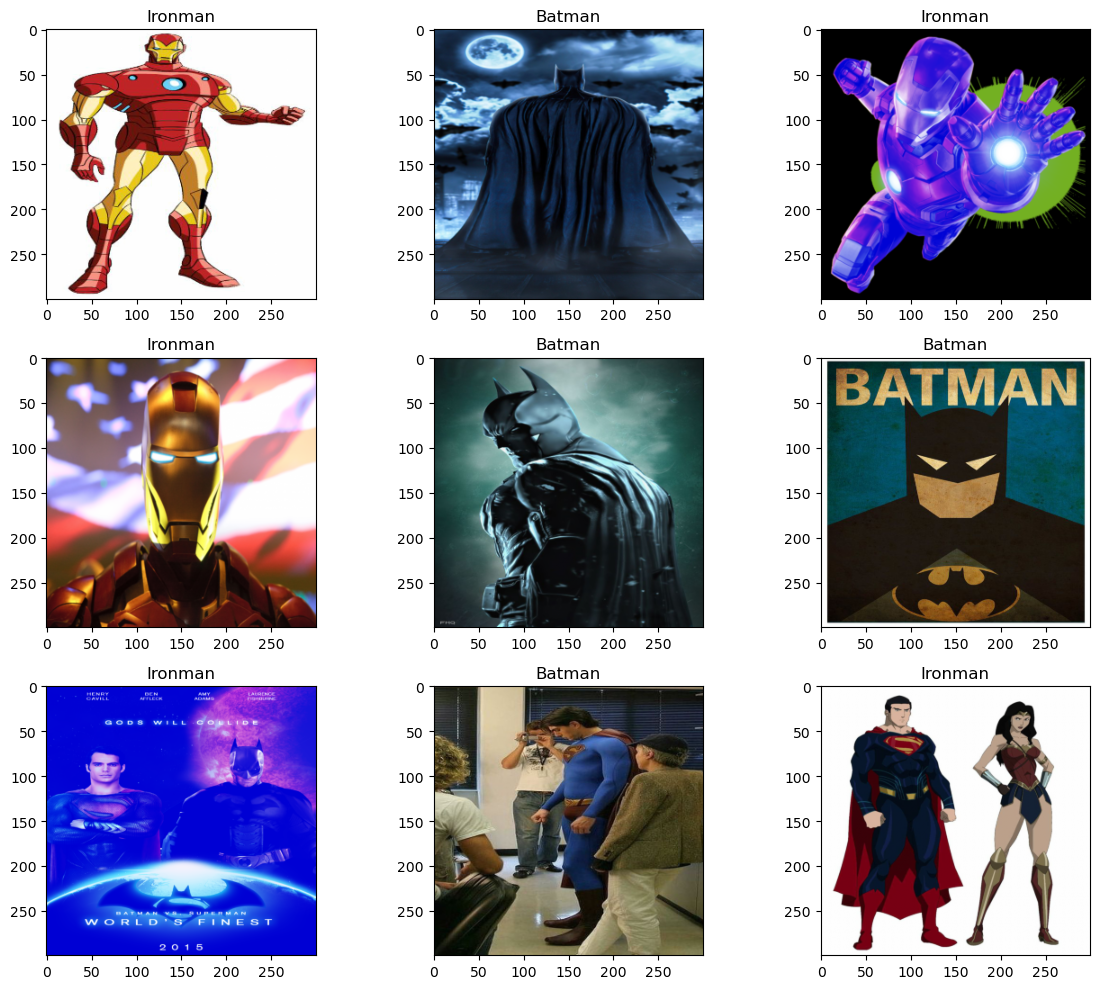

In [22]:
plt.figure(figsize=(12,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i].reshape(300,300,3))
    plt.title(label_names[y_pred[i]])
plt.tight_layout()

# Evaluating the Model:

In [24]:
accuracy_score(y_test,y_pred)

0.576036866359447

<Axes: >

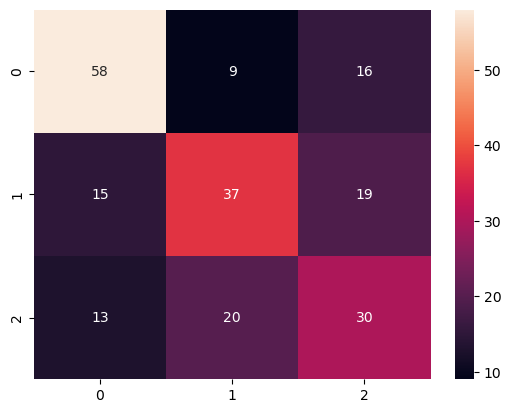

In [25]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True)

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.60      0.70      0.64        66
           2       0.64      0.68      0.66        72
           3       0.62      0.49      0.55        79

    accuracy                           0.62       217
   macro avg       0.62      0.62      0.62       217
weighted avg       0.62      0.62      0.61       217



We compute and print the accuracy score.
We plot a heatmap of the confusion matrix to visualize the performance.
We print a detailed classification report showing precision, recall, and F1-score for each class.